In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.manifold import TSNE
import plotly.express as px

data=pandas.read_csv('C:\\Users\\MSI\\educational_datasets\\student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Практическая работа №5.

#### №1 Сколько в наборе данных объектов и признаков? Дать описание каждому признаку, если оно есть.

In [ ]:
data.shape

(395, 33)

Всего в наборе 395 объектов и 33 признака.

$school$ - наименование школы.
<br>
$sex$ - пол учащегося.
<br>
$age$ - возраст учащегося.
<br>
$address$ - тип населенного пункта учащегося.
<br>
$famsize$ - размер семьи учащегося.
<br>
$Pstatus$ - статус сожительства родителей учащегося.
<br>
$Medu$ - уровень образования мамы учащегося.
<br>
$Fedu$ - уровень образования папы учащегося.
<br>
$Mjob$ - работа мамы учащегося.
<br>
$Fjob$ - работа папы учащегося.
<br>
$reason$ - причина выбора данной школы.
<br>
$guardian$ - опекун учащегося.
<br>
$traveltime$ - время в пути от дома до школы учащимся.
<br>
$studytime$ - количество учебных часов в неделю.
<br>
$failures$ - количество неудач на прошлых занятиях.
<br>
$schoolsup$ - дополнительная учебная помощь.
<br>
$famsup$ - учебная помощь в семье.
<br>
$paid$ - дополнительные платные учебные курсы.
<br>
$activities$ - внеучебная деятельность.
<br>
$nursery$ - посещал ли учащийся детский сад.
<br>
$higher$ - планирует ли учащийся о высшем образовании.
<br>
$internet$ - доступ в интернет у учащегося.
<br>
$romantic$ - состоит ли в отношениях.
<br>
$famrel$ - качество отношений в семье.
<br>
$freetime$ - свободное время после школы.
<br>
$goout$ - насколько часто выходит гулять с друзьями.
<br>
$Dalc$ - употребление алкоголя в течении рабочего дня.
<br>
$Walc$ - употребление алкоголя в выходные дни.
<br>
$health$ - группа здоровья.
<br>
$absences$ - количество пропусков занятий.
<br>
$G1$ - оценки за первый учебный период.
<br>
$G2$ - оценки за второй учебный период.
<br>
$G3$ - финальные оценки.

#### №2  Сколько категориальных признаков, какие?
<br>
В данном наборе данных 4 категориальных признака.
<br>
К категориальным признакам относятся:
<br>
-$Mjob$
<br>
-$Fjob$
<br>
-$reason$
<br>
-$guardian$

In [ ]:
data_nominal=data.loc[:,data.columns.isin(['Mjob','Fjob','reason','guardian'])]
data_nominal

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father
...,...,...,...,...
390,services,services,course,other
391,services,services,course,mother
392,other,other,course,other
393,services,other,course,mother


#### №3 Столбец с максимальным количеством уникальных значений категориального признака?

In [ ]:
print(data['Mjob'].value_counts())
print(data['Fjob'].value_counts())
print(data['reason'].value_counts())
print(data['guardian'].value_counts())

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64


Столбцы $Mjob$ и $Fjob$ имеют максимальное количество уникальных значений.

#### №4 Есть ли бинарные признаки?
<br>
Да, к таким признакам относятся:
<br>
-$school$
<br>
-$sex$
<br>
-$address$
<br>
-$Pstatus$
<br>
-$famsize$
<br>
-$schoolsup$
<br>
-$famsup$
<br>
-$paid$
<br>
-$activities$
<br>
-$nursery$
<br>
-$higher$
<br>
-$internet$
<br>
-$romantic$

In [ ]:
data_binary=data.loc[:,data.columns.isin(['school','sex','address','famsize','Pstatus','higher','schoolsup','famsup','paid','activities','nursery','internet','romantic'])]
data_binary

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,no,no,no,no,no,yes,yes,no


#### №5 Какие числовые признаки?
<br>
К числовым признакам относятся:
<br>
-$age$
<br>
-$Medu$
<br>
-$Fedu$
<br>
-$traveltime$
<br>
-$studytime$
<br>
-$failures$
<br>
-$famrel$
<br>
-$freetime$
<br>
-$goout$
<br>
-$Dalc$
<br>
-$Walc$
<br>
-$health$
<br>
-$absences$
<br>
-$G1$
<br>
-$G2$
<br>
-$G3$

In [ ]:
data_numeric=data.loc[:,data.columns.isin(['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3'])]
data_numeric

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


#### №6 Есть ли пропуски?

In [ ]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Пропусков нет.

#### №7 Сколько объектов с пропусками?

In [ ]:
print(sum(data.isnull().sum(axis=1)))

0


0

#### №8 Столбец с максимальным количеством пропусков?
<br>
Такого столбца нет, так как пропусков в наборе данных нет.

#### №9 Есть ли на ваш взгляд выбросы? Аномальные значения?

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


*Максимальное количество пропусков занятий от среднего сильно разнится.*
<br>
*Это может быть связано с тем, что какие-то студенты очень часто прогуливали занятия или пропускали по болезни.*
<br>
*Объекты с таким значением можно отнести к выбросам, так как они не отображают общей тенденции, и скорее являются частными случаями*.

#### №10  Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение?


В ходе нормализации будем нормализовывать числовые признаки, но которые принимают реальные вещественные значения, а не являются описанием какого-либо признака.
<br>
К таким признакам относятся:
<br>
-$age$
<br>
-$absences$
<br>
-$G1$
<br>
-$G2$
<br>
-$G3$

In [ ]:
scale_features_std = StandardScaler()
features_std = scale_features_std.fit_transform(data[['absences']])
data['absences_std']=features_std
features_std=scale_features_std.fit_transform(data[['G1']])
data['G1_std']=features_std
features_std=scale_features_std.fit_transform(data[['G2']])
data['G2_std']=features_std
features_std=scale_features_std.fit_transform(data[['G3']])
data['G3_std']=features_std
features_std = scale_features_std.fit_transform(data[['age']])
data['age_std']=features_std


data_std=data.loc[:,data.columns.isin(['absences_std','G1_std','G2_std','G3_std', 'age_std'])]
data_std.describe()

,absences_std,G1_std,G2_std,G3_std,age_std
count,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02
mean,1.914783e-17,-5.424634e-17,-1.262000e-16,-2.119261e-16,1.411529e-15
std,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00
min,-7.142362e-01,-2.385787e+00,-2.851920e+00,-2.276226e+00,-1.330954e+00
25%,-7.142362e-01,-8.774869e-01,-4.562264e-01,-5.278366e-01,-5.462869e-01
50%,-2.137958e-01,2.749306e-02,7.615005e-02,1.278095e-01,2.383798e-01
75%,2.866447e-01,6.308130e-01,6.085265e-01,7.834555e-01,1.023046e+00
max,8.669022e+00,2.440773e+00,2.205656e+00,2.094748e+00,4.161713e+00


Столбец с максимальным средним значением после нормализации с помощью стандартного отклонения - $absences$

#### №11  Столбец с целевым признаком?
В данном наборе данных целевым признаком является параметр $G3$, так как данный параметр отвечает за итоговую успеваемость учащихся.

In [ ]:
target=data.loc[:,data.columns.isin(['G3'])]
target

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


#### №12 Сколько параметров попадает в тренировочную выборку при параметрах: test_size=0.3, random_state=42?

Выделяем подмножество параметров, удаляем из изначального набора данных параметры Dalc, Walc. Но для начала сделаем предобработку категориальных признаков, а также бинарных, которые в столбцах содержат строчные типы данных.

Предобработка категориальных признаков.

In [ ]:
label = LabelEncoder()
label.fit(data.Mjob)
data.Mjob = label.transform(data.Mjob)

label = LabelEncoder()
label.fit(data.Fjob)
data.Fjob = label.transform(data.Fjob)

label = LabelEncoder()
label.fit(data.reason)
data.reason = label.transform(data.reason)

label = LabelEncoder()
label.fit(data.guardian)
data.guardian = label.transform(data.guardian)

data_nominal=data.loc[:,data.columns.isin(['Mjob','Fjob','reason','guardian'])]
data_nominal

,Mjob,Fjob,reason,guardian
0,0,4,0,1
1,0,2,0,0
2,0,2,2,1
3,1,3,1,1
4,2,2,1,0
...,...,...,...,...
390,3,3,0,2
391,3,3,0,1
392,2,2,0,2
393,3,2,0,1


In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,absences_std,G1_std,G2_std,G3_std,age_std
0,GP,F,18,U,GT3,A,4,4,0,4,...,3,6,5,6,6,0.036424,-1.782467,-1.254791,-0.964934,1.023046
1,GP,F,17,U,GT3,T,1,1,0,2,...,3,4,5,5,6,-0.213796,-1.782467,-1.520979,-0.964934,0.238380
2,GP,F,15,U,LE3,T,1,1,0,2,...,3,10,7,8,10,0.536865,-1.179147,-0.722415,-0.090739,-1.330954
3,GP,F,15,U,GT3,T,4,2,1,3,...,5,2,15,14,15,-0.464016,1.234133,0.874715,1.002004,-1.330954
4,GP,F,16,U,GT3,T,3,3,2,2,...,5,4,6,10,10,-0.213796,-1.480807,-0.190038,-0.090739,-0.546287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,3,3,...,4,11,9,9,9,0.661975,-0.575827,-0.456226,-0.309288,2.592380
391,MS,M,17,U,LE3,T,3,1,3,3,...,2,3,14,16,16,-0.338906,0.932473,1.407091,1.220553,0.238380
392,MS,M,21,R,GT3,T,1,1,2,2,...,3,3,10,8,7,-0.338906,-0.274167,-0.722415,-0.746385,3.377047
393,MS,M,18,R,LE3,T,3,2,3,2,...,5,0,11,12,10,-0.714236,0.027493,0.342338,-0.090739,1.023046


Предобработка бинарных признаков.

In [ ]:
label = LabelEncoder()
label.fit(data.school)
data.school = label.transform(data.school)

label = LabelEncoder()
label.fit(data.sex)
data.sex = label.transform(data.sex)

label = LabelEncoder()
label.fit(data.address)
data.address = label.transform(data.address)

label = LabelEncoder()
label.fit(data.famsize)
data.famsize = label.transform(data.famsize)

label = LabelEncoder()
label.fit(data.Pstatus)
data.Pstatus = label.transform(data.Pstatus)

label = LabelEncoder()
label.fit(data.schoolsup)
data.schoolsup = label.transform(data.schoolsup)

label = LabelEncoder()
label.fit(data.famsup)
data.famsup = label.transform(data.famsup)

label = LabelEncoder()
label.fit(data.paid)
data.paid = label.transform(data.paid)

label = LabelEncoder()
label.fit(data.activities)
data.activities = label.transform(data.activities)

label = LabelEncoder()
label.fit(data.nursery)
data.nursery = label.transform(data.nursery)

label = LabelEncoder()
label.fit(data.higher)
data.higher = label.transform(data.higher)

label = LabelEncoder()
label.fit(data.internet)
data.internet = label.transform(data.internet)

label = LabelEncoder()
label.fit(data.romantic)
data.romantic = label.transform(data.romantic)

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,absences_std,G1_std,G2_std,G3_std,age_std
0,0,0,18,1,0,0,4,4,0,4,...,3,6,5,6,6,0.036424,-1.782467,-1.254791,-0.964934,1.023046
1,0,0,17,1,0,1,1,1,0,2,...,3,4,5,5,6,-0.213796,-1.782467,-1.520979,-0.964934,0.238380
2,0,0,15,1,1,1,1,1,0,2,...,3,10,7,8,10,0.536865,-1.179147,-0.722415,-0.090739,-1.330954
3,0,0,15,1,0,1,4,2,1,3,...,5,2,15,14,15,-0.464016,1.234133,0.874715,1.002004,-1.330954
4,0,0,16,1,0,1,3,3,2,2,...,5,4,6,10,10,-0.213796,-1.480807,-0.190038,-0.090739,-0.546287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,4,11,9,9,9,0.661975,-0.575827,-0.456226,-0.309288,2.592380
391,1,1,17,1,1,1,3,1,3,3,...,2,3,14,16,16,-0.338906,0.932473,1.407091,1.220553,0.238380
392,1,1,21,0,0,1,1,1,2,2,...,3,3,10,8,7,-0.338906,-0.274167,-0.722415,-0.746385,3.377047
393,1,1,18,0,1,1,3,2,3,2,...,5,0,11,12,10,-0.714236,0.027493,0.342338,-0.090739,1.023046


In [ ]:
parameters=data.loc[:,data.columns.isin(['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2'])]
parameters

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


Выделение тренировочной и тестовой выборок.

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(parameters,target,test_size=.3,random_state=42)
print(y_test.shape)
print(x_test.shape)

(119, 1)
(119, 32)


При заданных параметрах в тренировочную выборку попадает 119 объектов.

#### № 13 Между какими признаками наблюдается линейная зависимость (корреляция)?


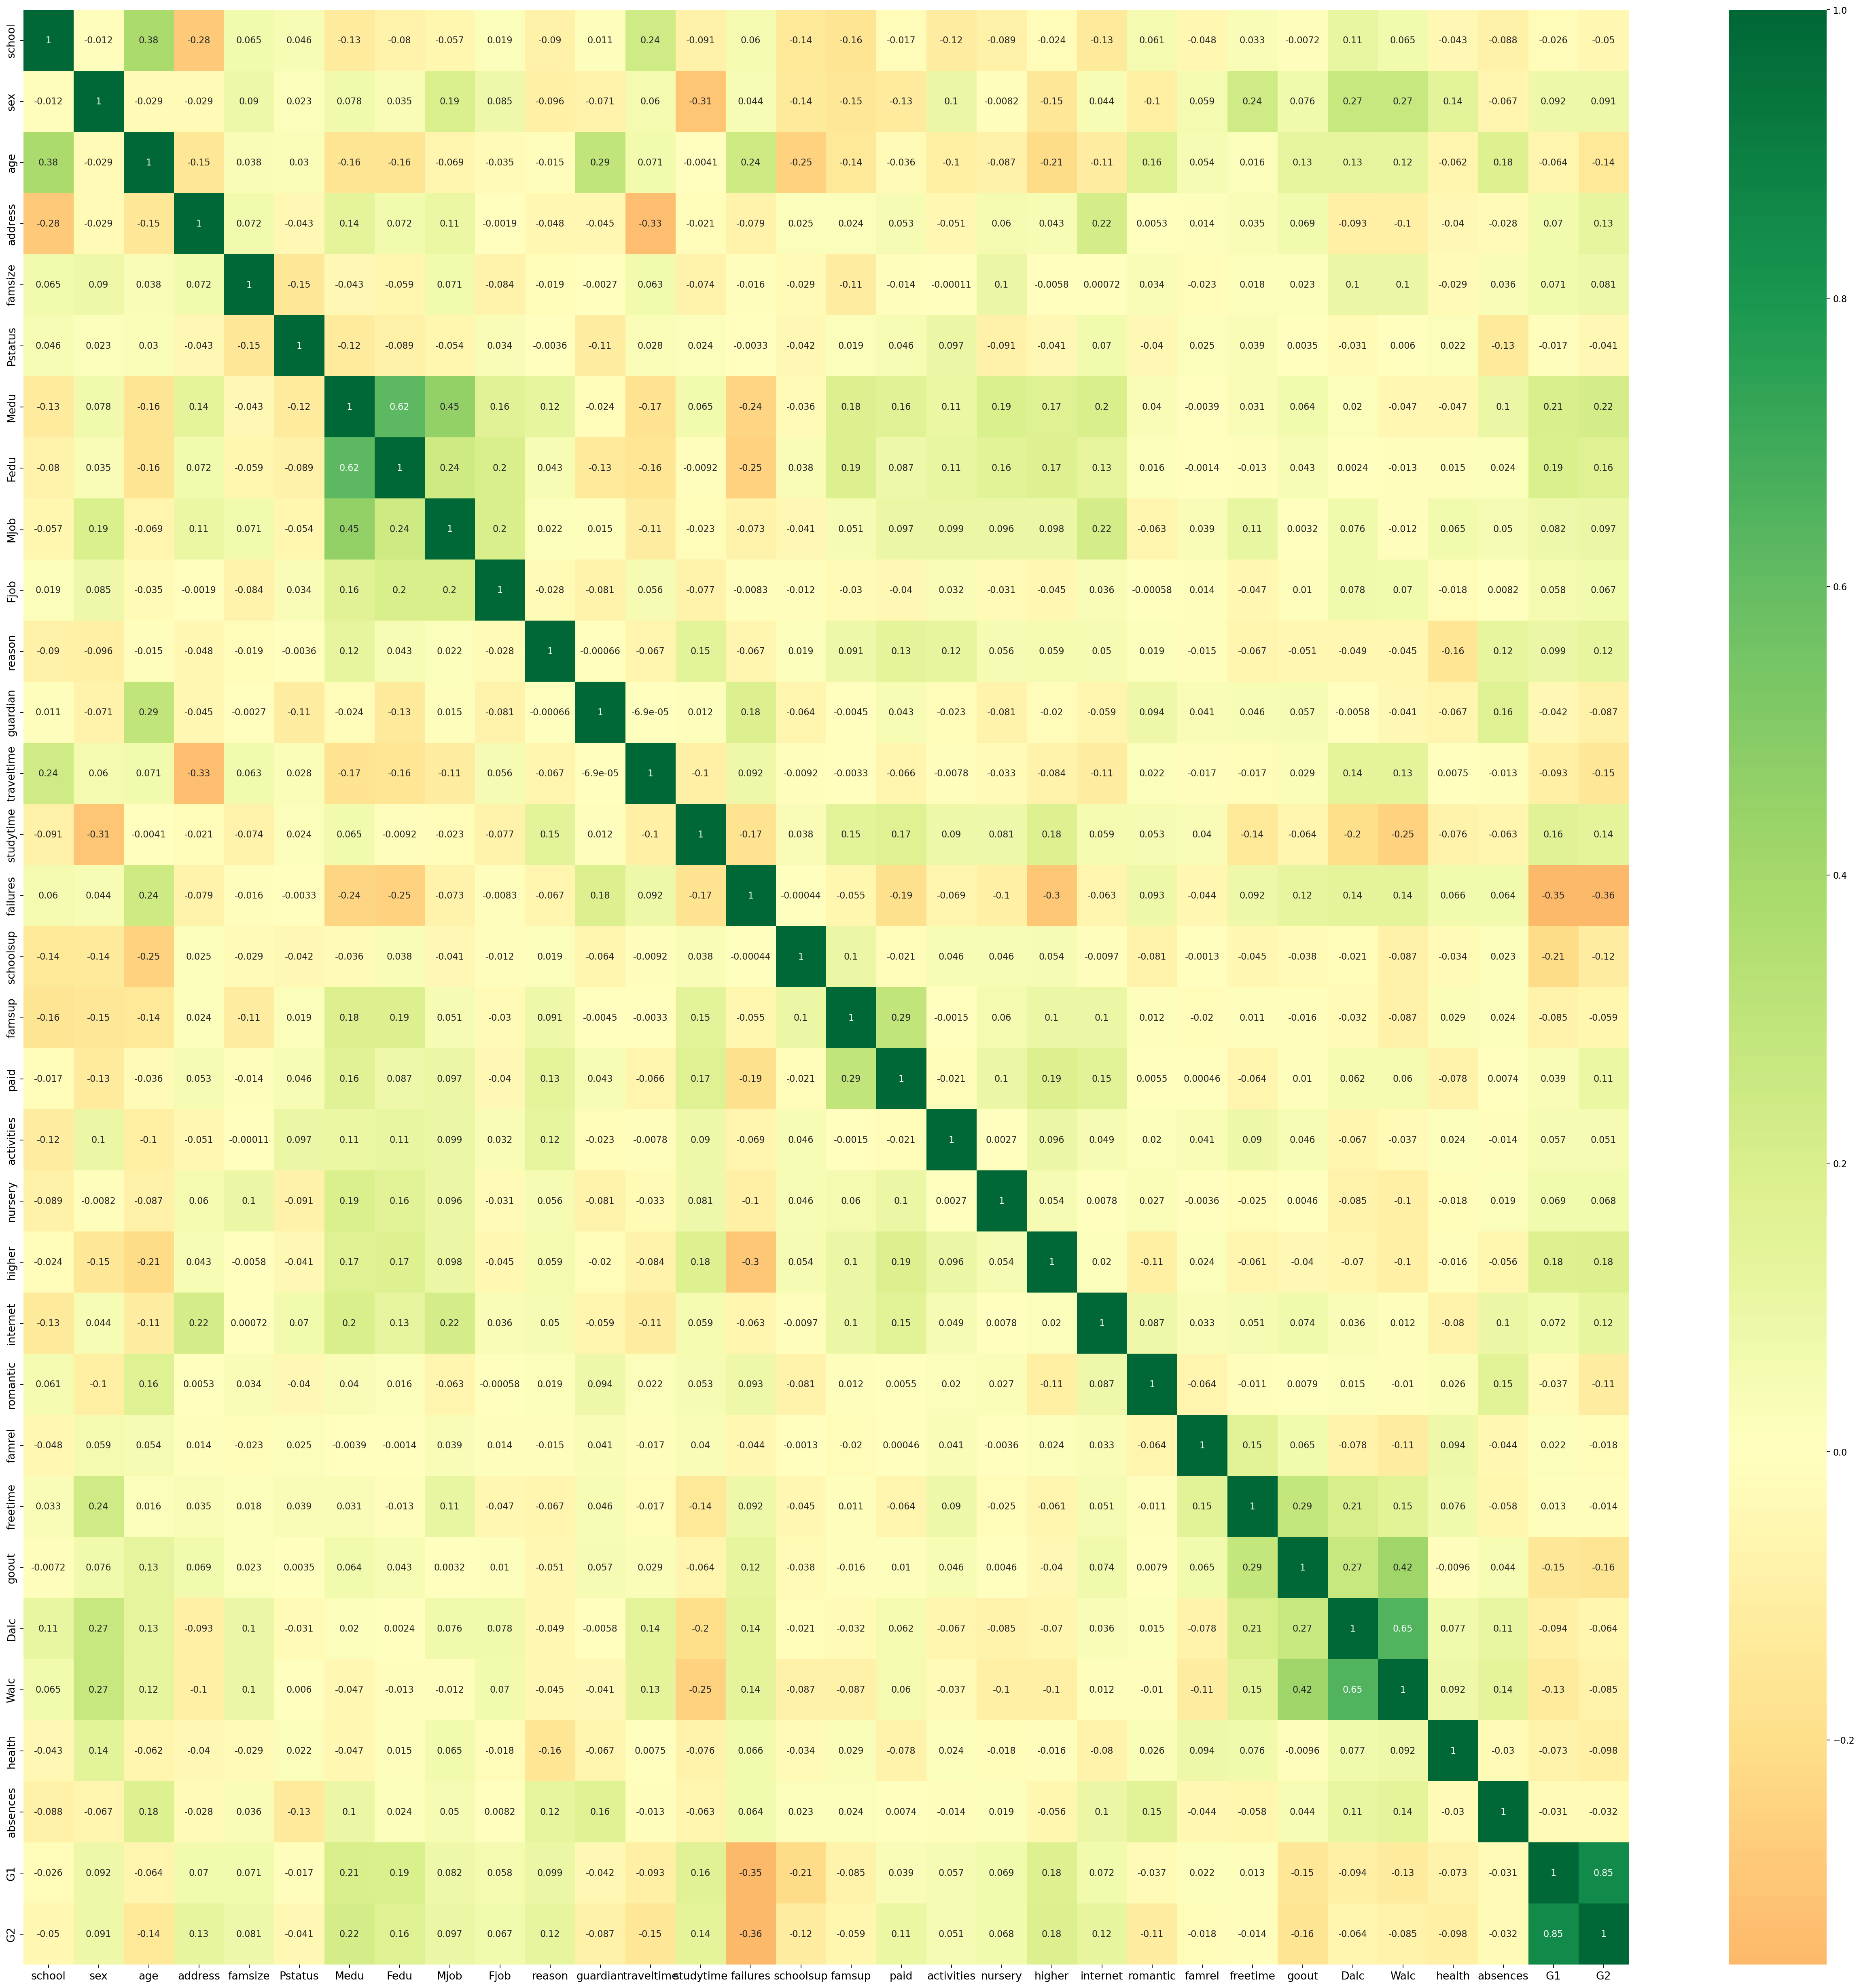

In [ ]:
plt.figure(figsize=(40,40), dpi= 160)
sns.heatmap(parameters.corr(), xticklabels=parameters.corr().columns, yticklabels=parameters.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Из таблицы можно сделать вывод, что параметры $G1, G2$ линейно зависимы. Также линейно зависимыми являются параметры $Dalc, Walc$. Эти взаимосвязи являются вполне очевидными. Так как успеваемость учеников зачастую не имеет сильных колебаний в рамках учебного периода в старшей школе. Также и с употреблением в будни и выходные дни алкоголя учащимися. Ученики выпивающие в течении недели выпивают и на выходных.

#### № 14  Сколько признаков достаточно для объяснения 90% дисперсии после применения метода PCA?

In [ ]:
pca = PCA()
pca.fit(x_train)
x_pca = pca.transform(x_train)

In [ ]:
for i, component in enumerate(pca.components_):
 print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
 print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component,parameters.columns)))

1 component: 63.59% of initial variance
-0.003 x school + -0.007 x sex + 0.024 x age + -0.002 x address + 0.001 x famsize + -0.004 x Pstatus + 0.013 x Medu + 0.002 x Fedu + 0.001 x Mjob + 0.002 x Fjob + 0.021 x reason + 0.009 x guardian + 0.002 x traveltime + -0.004 x studytime + 0.002 x failures + 0.001 x schoolsup + -0.000 x famsup + 0.001 x paid + -0.000 x activities + -0.002 x nursery + -0.002 x higher + 0.005 x internet + 0.008 x romantic + -0.006 x famrel + -0.012 x freetime + -0.001 x goout + 0.014 x Dalc + 0.025 x Walc + -0.011 x health + 0.999 x absences + -0.001 x G1 + -0.001 x G2
2 component: 18.67% of initial variance
-0.002 x school + -0.004 x sex + 0.021 x age + -0.004 x address + -0.004 x famsize + 0.003 x Pstatus + -0.049 x Medu + -0.036 x Fedu + -0.022 x Mjob + -0.010 x Fjob + -0.037 x reason + 0.003 x guardian + 0.017 x traveltime + -0.029 x studytime + 0.059 x failures + 0.012 x schoolsup + 0.008 x famsup + -0.015 x paid + -0.007 x activities + -0.003 x nursery + -0.

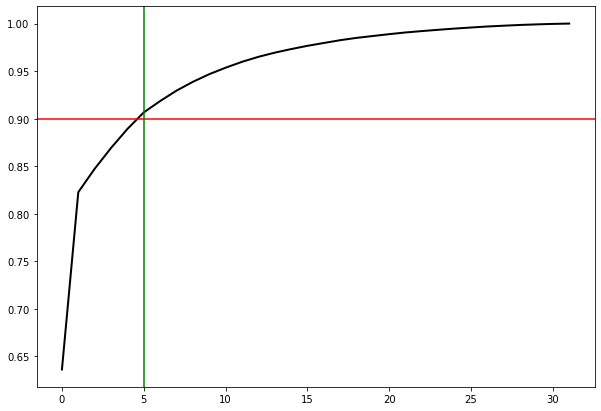

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(5, c='g')

Для объяснения 90% дисперсии после применения метода PCA достаточно 5 компонент.

#### № 15 Какой признак вносит наибольший вклад в первую компоненту?

Признак $higher$ вносит наибольший вклад в первую компоненту.

#### № 16  Построить двухмерное представление данных с помощью алгоритма t-SNE. На сколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить смысл кластеров.

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-9.01729393e+00 -1.09378443e+01]
 [-6.32422924e+00 -1.21482372e+01]
 [-1.19145775e+01 -2.53237748e+00]
 [ 1.31403446e+01  1.11322317e+01]
 [-3.25974107e+00 -5.32116985e+00]
 [-4.11513281e+00  1.24510403e+01]
 [ 1.23692694e+01  3.11202598e+00]
 [-8.99531746e+00 -1.11290531e+01]
 [ 1.27350645e+01  1.69379196e+01]
 [ 1.34850998e+01  7.69777775e+00]
 [ 1.06605473e+01 -1.21756163e+01]
 [-5.74288726e-01 -6.83745503e-01]
 [ 9.83118153e+00  6.96906042e+00]
 [ 9.18896770e+00 -9.75568485e+00]
 [ 1.36708441e+01  8.79743958e+00]
 [ 3.99031496e+00  8.75489330e+00]
 [ 1.08820486e+00  9.53539658e+00]
 [-3.31703854e+00 -4.07303286e+00]
 [-1.91457100e+01  4.24951696e+00]
 [-2.60686731e+00 -5.87950230e+00]
 [ 1.73954792e+01  1.02902222e+01]
 [ 1.36331234e+01  6.82560873e+00]
 [ 1.01788931e+01  1.31542063e+01]
 [ 1.44064026e+01  2.18822503e+00]
 [ 6.92938900e+00 -6.18723536e+00]
 [-1.75712357e+01  4.37803173e+00]
 [ 1.00705462e+01  1.25325763e+00]
 [ 5.74016571e+00  1.14452963e+01]
 [ 3.67951727e+00 -1

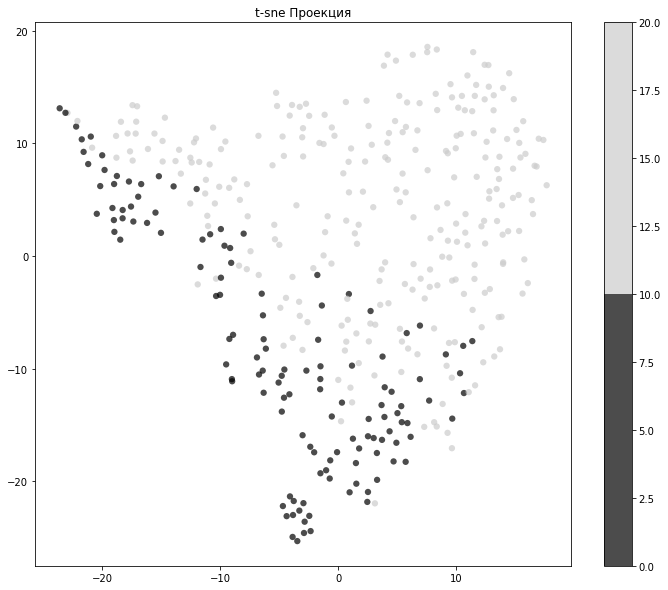

In [ ]:
from sklearn.manifold import TSNE
tnse=TSNE(random_state=47)
X_tsne=tnse.fit_transform(parameters)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['G3'],edgecolor='none',alpha=0.7,s=40,
            cmap=plt.cm.get_cmap('nipy_spectral',2))
plt.colorbar()
plt.title('t-sne Проекция')
print(X_tsne)

#### Объекты можно визуально разделить на 3 класса, объекты нижнего класса имеют плохую успеваемость, центрального(также самого многочисленного класса) имеют низкую-среднюю успевамости, объекты самого верхнего класса имеют высокую успеваемость.